1. 

En este ejercicio vas a trabajar con un clasificador binario. Para ello utilizarás el dataset usuarios_win_mac_lin.csv. Elimina del dataframe todas las filas que se correspondan con la clase valor "1". Encontrarás datos de navegación de usuarios dentro de una web (paginas, duración...) y tendrás que predecir desde qué sistema operativo viene el usuario.

Realiza el ejercicio con el nuevo dataframe (eliminando los 1s):

- ¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (toca, modifica, prueba) las variables y comenta si hay alguna de ellas que, modificándola, mejore el porcentaje de acierto del problema.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score

In [6]:
df = pd.read_csv('data/usuarios_win_mac_lin.csv')
df.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [7]:
# Eliminamos
df = df[~(df['clase'] == 1)]
df.clase.unique()

array([2, 0], dtype=int64)

In [8]:
X = df.drop('clase', 1)
y = df.clase

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [10]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2], dtype=int64)

In [14]:
y_test.tolist()

[0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0]

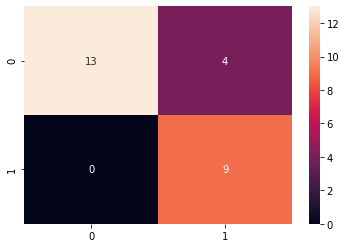

In [17]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True);

In [21]:
print(model.score(X_test, y_test))
print(accuracy_score(y_pred, y_test))

0.8461538461538461
0.8461538461538461
